<a href="https://colab.research.google.com/github/4gzjw4dq7h-coder/blank-app/blob/main/251126_SDRIS_Tension_Eigenwert_StandardModell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

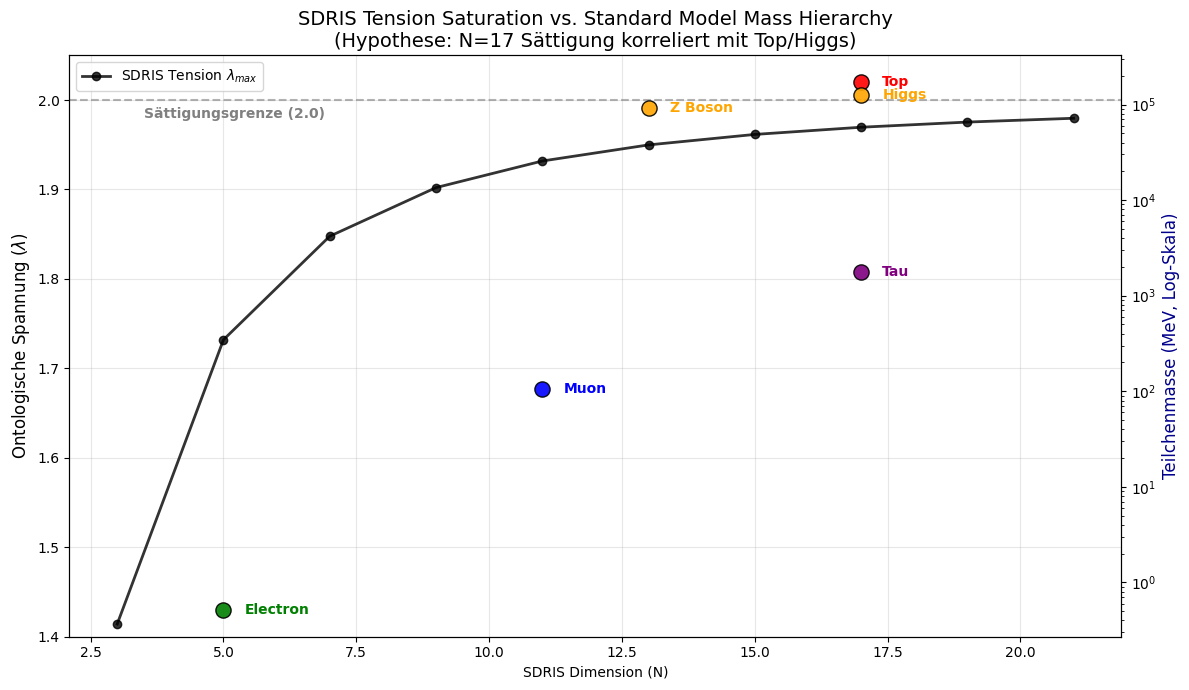

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Die Physik-Logik (SDRIS Spannung) ---
def get_sdris_tension(n):
    """
    Berechnet die maximale ontologische Spannung (Eigenwert)
    Formel: lambda_max = 2 * cos(pi / (N + 1))
    """
    return 2 * np.cos(np.pi / (n + 1))

# --- 2. Die Visualisierung ---
def plot_correlation():
    # Daten generieren
    dimensions = np.arange(3, 23, 2) # Ungerade Dimensionen bis 21
    tensions = [get_sdris_tension(n) for n in dimensions]

    # Standard Modell Daten (Massen in MeV)
    particles = {
        "Electron": {"mass": 0.511, "color": "green", "dim_guess": 5},
        "Muon":     {"mass": 105.66, "color": "blue", "dim_guess": 11},
        "Tau":      {"mass": 1776.8, "color": "purple", "dim_guess": 17},
        "Top":      {"mass": 173000, "color": "red", "dim_guess": 17},
        "Higgs":    {"mass": 125100, "color": "orange", "dim_guess": 17},
        "Z Boson":  {"mass": 91187,  "color": "orange", "dim_guess": 13}
    }

    fig, ax1 = plt.subplots(figsize=(12, 7))

    # Plot 1: SDRIS Spannung (Links)
    ax1.set_xlabel('SDRIS Dimension (N)')
    ax1.set_ylabel('Ontologische Spannung ($\\lambda$)', color='black', fontsize=12)
    ax1.plot(dimensions, tensions, 'o-', color='black', label='SDRIS Tension $\\lambda_{max}$', linewidth=2, alpha=0.8)
    ax1.tick_params(axis='y', labelcolor='black')
    ax1.set_ylim(1.4, 2.05)
    ax1.grid(True, alpha=0.3)

    # Sättigungslinie
    ax1.axhline(y=2.0, color='grey', linestyle='--', alpha=0.6)
    ax1.text(3.5, 1.98, "Sättigungsgrenze (2.0)", color='grey', fontweight='bold')

    # Plot 2: Teilchenmassen (Rechts)
    ax2 = ax1.twinx()
    ax2.set_ylabel('Teilchenmasse (MeV, Log-Skala)', color='darkblue', fontsize=12)
    ax2.set_yscale('log')

    # Teilchen plotten
    for name, data in particles.items():
        dim = data["dim_guess"]
        mass = data["mass"]
        ax2.scatter(dim, mass, color=data["color"], s=120, edgecolors='black', zorder=10, alpha=0.9)
        ax2.text(dim + 0.4, mass, f"{name}", verticalalignment='center', fontsize=10, color=data["color"], fontweight='bold')

    # Titel und Layout
    plt.title('SDRIS Tension Saturation vs. Standard Model Mass Hierarchy\n(Hypothese: N=17 Sättigung korreliert mit Top/Higgs)', fontsize=14)
    lines, labels = ax1.get_legend_handles_labels()
    ax1.legend(lines, labels, loc='upper left')

    plt.tight_layout()
    plt.show()

# Ausführen
if __name__ == "__main__":
    plot_correlation()